In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load dataset
df = pd.read_csv("Twitter_Data.csv")

# Quick overview
df.columns = df.columns.str.strip().str.replace(' ', '_')
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())
import pandas as pd

# Load dataset
df = pd.read_csv("Twitter_Data.csv")

# Quick overview
df.columns = df.columns.str.strip().str.replace(' ', '_')
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())


                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB
None
            category
count  162973.000000
mean        0.225436
std         0.781279
min        -1.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
clean_text    4
category      7
dtype: int64
                                          clean_text 

In [8]:
df.columns



Index(['clean_text', 'category'], dtype='object')

In [4]:
# ==============================
# 2️⃣ Data Cleaning
# ==============================

# Drop rows with missing values
df = df.dropna().reset_index(drop=True)

# Convert category to integer (optional for modeling)
df['category'] = df['category'].astype(int)

# Quick check after cleaning
print("Cleaned dataset shape:", df.shape)
display(df.head())
print("\nMissing values after cleaning:")
display(df.isnull().sum())


Cleaned dataset shape: (162969, 2)


,clean_text,category
0,when modi promised “minimum government maximum...,-1
1,talk all the nonsense and continue all the dra...,0
2,what did just say vote for modi welcome bjp t...,1
3,asking his supporters prefix chowkidar their n...,1
4,answer who among these the most powerful world...,1



Missing values after cleaning:


clean_text    0
category      0
dtype: int64

In [9]:
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())


                                          clean_text  category
0  when modi promised “minimum government maximum...        -1
1  talk all the nonsense and continue all the dra...         0
2  what did just say vote for modi  welcome bjp t...         1
3  asking his supporters prefix chowkidar their n...         1
4  answer who among these the most powerful world...         1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162969 entries, 0 to 162968
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   clean_text  162969 non-null  object
 1   category    162969 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.5+ MB
None
            category
count  162969.000000
mean        0.225442
std         0.781279
min        -1.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
clean_text    0
category      0
dtype: int64


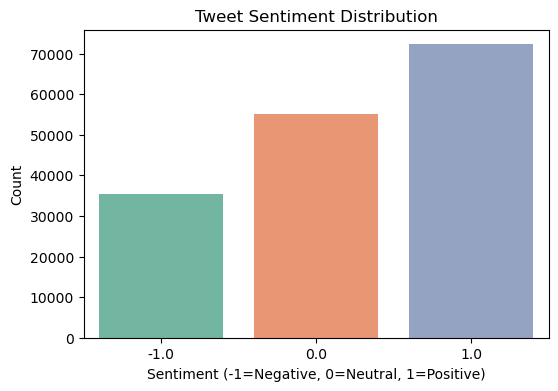

In [15]:


plt.figure(figsize=(6,4))

# Map x to hue to allow palette without warning
sns.countplot(data=df, x='category', hue='category', palette='Set2', dodge=False)
plt.legend([],[], frameon=False)  # remove extra legend
plt.title("Tweet Sentiment Distribution")
plt.xlabel("Sentiment (-1=Negative, 0=Neutral, 1=Positive)")
plt.ylabel("Count")
plt.show()


In [16]:
# Sentiment counts
sentiment_counts = df['category'].value_counts()
print(sentiment_counts)

# Percentages
sentiment_percent = df['category'].value_counts(normalize=True) * 100
print(sentiment_percent)


category
 1.0    72250
 0.0    55213
-1.0    35510
Name: count, dtype: int64
category
 1.0    44.332497
 0.0    33.878618
-1.0    21.788885
Name: proportion, dtype: float64


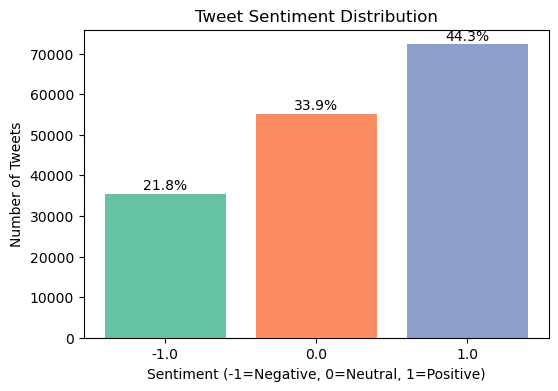

In [21]:


# Counts and proportions
sentiment_counts = df['category'].value_counts().sort_index()
sentiment_props = df['category'].value_counts(normalize=True).sort_index() * 100

# Colors for each bar
colors = ['#66c2a5', '#fc8d62', '#8da0cb']  # negative, neutral, positive

plt.figure(figsize=(6,4))

# Plot bars individually with colors
for i, (cat, count) in enumerate(sentiment_counts.items()):
    plt.bar(i, count, color=colors[i])
    plt.text(i, count + 1000, f"{sentiment_props.values[i]:.1f}%", ha='center')

plt.xticks(range(len(sentiment_counts)), sentiment_counts.index)
plt.xlabel("Sentiment (-1=Negative, 0=Neutral, 1=Positive)")
plt.ylabel("Number of Tweets")
plt.title("Tweet Sentiment Distribution")
plt.show()


In [27]:
# ==============================
# 6️, Recommendations
# ==============================

print(" Recommendations based on sentiment analysis:\n")

# 1. Positive sentiment
print("1. Positive Tweets (1):")
print("- These users are satisfied or supportive.")
print("- Engage them further with personalized offers or campaigns.\n")

# 2. Neutral sentiment
print("2. Neutral Tweets 0:")
print("- These users are indifferent or undecided.")
print("- Provide informative content or promotions to influence them positively.\n")

# 3. Negative sentiment (-1)
print("3. Negative Tweets (-1):")
print("- These users are dissatisfied or critical.")
print("- Address their complaints quickly and improve customer experience.")


 Recommendations based on sentiment analysis:

1. Positive Tweets (1):
- These users are satisfied or supportive.
- Engage them further with personalized offers or campaigns.

2. Neutral Tweets 0:
- These users are indifferent or undecided.
- Provide informative content or promotions to influence them positively.

3. Negative Tweets (-1):
- These users are dissatisfied or critical.
- Address their complaints quickly and improve customer experience.
